In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
gdp_df = pd.read_csv(r'C:\da12\projects\un-python-Zavello\data\gdp_percapita.csv')

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

5. How many rows and columns are in `gdp_df`? What are the data types of each column?
   There are 7,662 rows and 4 columns. We have a Object, integer, and two floats to represent the columns.

In [37]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [39]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [55]:
gdp_new = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp = gdp_new.drop(columns=['Value Footnotes'])
print(gdp)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year.
What do you notice?

In [10]:
max_year = gdp['Year'].max()
min_year = gdp['Year'].min()
print(max_year)
print(min_year)

2022
1990


In [11]:
all_year_country = gdp['Country'].value_counts(sort=True)
#

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [65]:
year_2020 = gdp[gdp.Year == 2020]
year_2020 = year_2020.drop(columns=['Year'])
print(year_2020)

                          Country  GDP_Per_Capita
1                     Afghanistan     1968.341002
22    Africa Eastern and Southern     3455.023119
55     Africa Western and Central     3957.933804
88                        Albania    13278.369769
121                       Algeria    10844.770764
...                           ...             ...
7503                     Viet Nam    10450.622382
7536           West Bank and Gaza     5402.538773
7565                        World    16204.169107
7598                       Zambia     3183.650773
7631                     Zimbabwe     1990.319419

[242 rows x 2 columns]


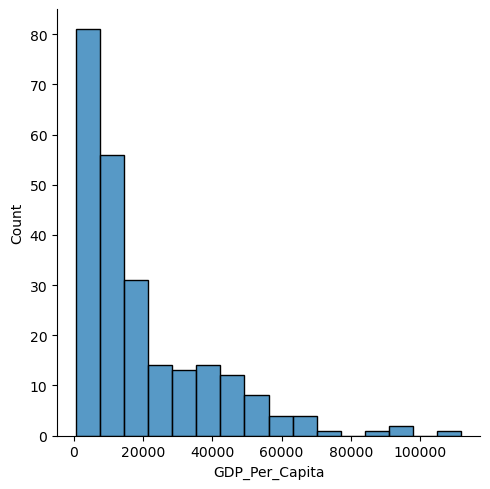

In [77]:
sns.displot(data=year_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

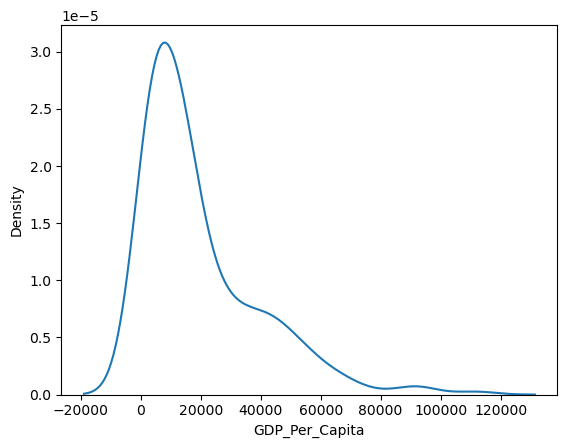

In [79]:
sns.kdeplot(year_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

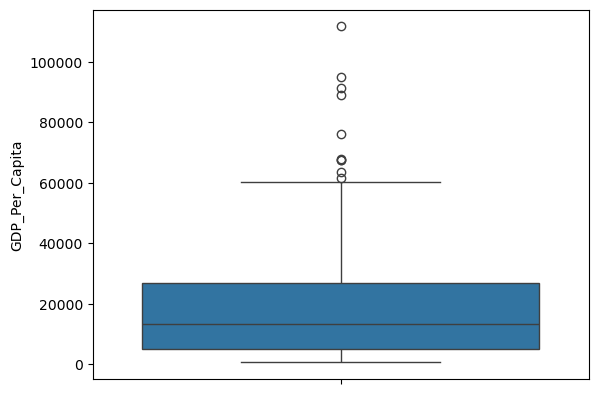

In [87]:
sns.boxplot( y=year_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

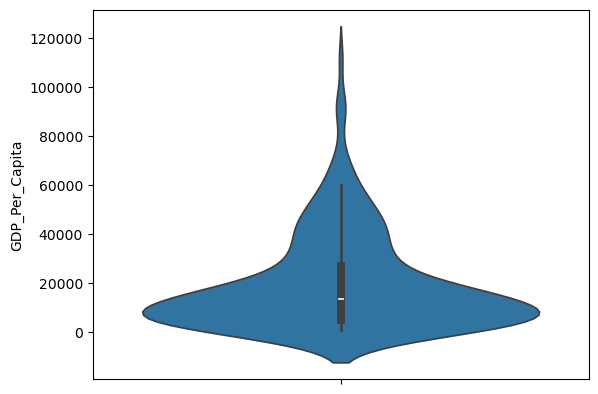

In [91]:
sns.violinplot(y=year_2020['GDP_Per_Capita'])

These plots are made to give you a distribution of the GDP Per Capita for every country in 2020. The Histogram is the only plot that also gives the count of the amount of countries in that bin for their GDP Per Capita. All other plots only have a relative distribution of the data.

9. What was the median GDP per capita value in 2020?

In [95]:
year_2020['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [126]:
gdp_decades = gdp[(gdp['Year'] == 1990) | (gdp['Year'] ==2000) |  (gdp['Year'] ==2010) | (gdp['Year'] ==2020)]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

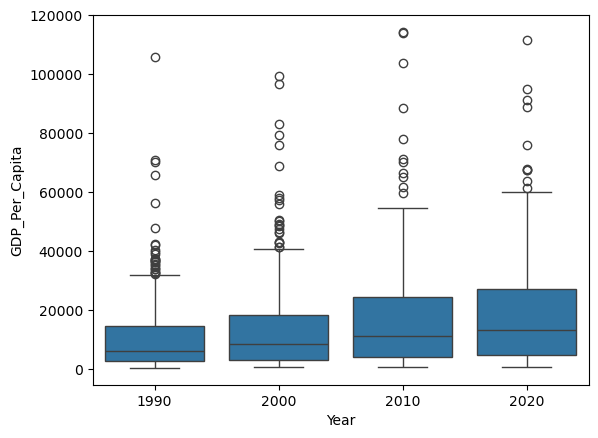

In [128]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

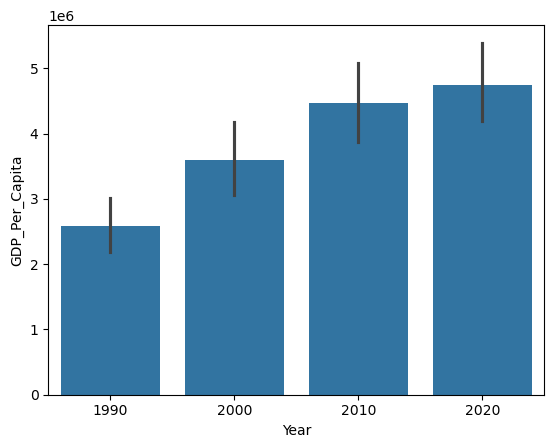

In [146]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], data=gdp_decades, estimator=sum) #this gives max, I want Sum

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

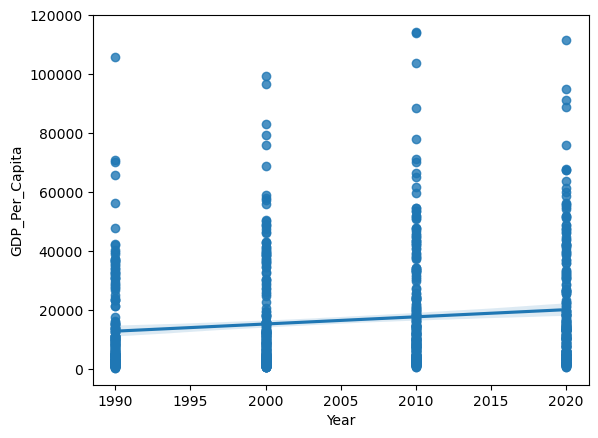

In [148]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])